# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them and find the best one that will help identify failures so that the generator could be repaired before failing/breaking and the overall maintenance cost of the generators can be brought down. 

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a wind turbine where there is no detection by model. 
- False positives (FP) are detections in a wind turbine where there is no failure. 

So, the maintenance cost associated with the model would be:

**Maintenance cost** = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
where,

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

- The minimum possible maintenance cost  =  `Actual failures*(Repair cost) = (TP + FN)*(Repair cost)`
- The maintenance cost associated with model = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`

So, we will try to maximize the ratio of minimum possible maintenance cost and the maintenance cost associated with the model.

The value of this ratio will lie between 0 and 1, the ratio will be 1 only when the maintenance cost associated with the model will be equal to the minimum possible maintenance cost.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
data1 = pd.read_csv("Train.csv")
data = data1
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [3]:
data.shape

(40000, 41)

<IPython.core.display.Javascript object>

There are 40,000 rows and 41 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

* All are numeric values.
* There are some missing values in 2 columns.

In [5]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no missing values.

In [6]:
# let's check for missing values in the data
data.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* 46 values are missing in column V1
* 39 values are missing in column V2

In [7]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

* Minimum values are negative.
* Maximum values are positive.
* Target variable has 2 values: 0 and 1.

## EDA and insights

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(3, 3), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

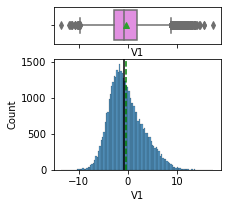

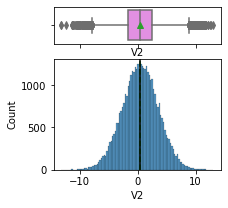

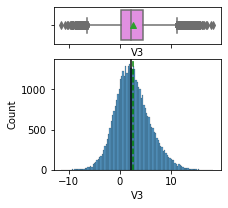

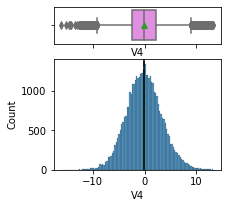

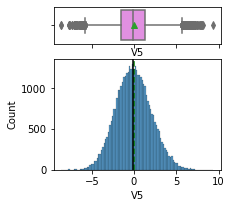

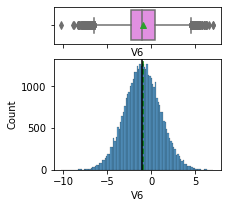

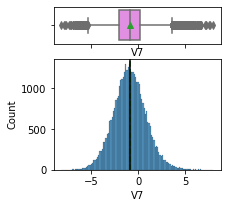

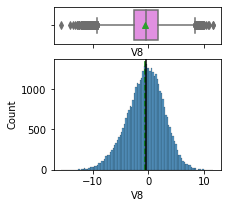

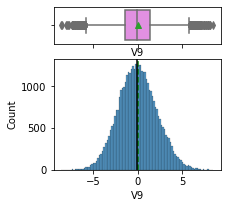

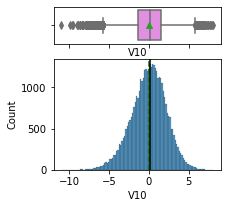

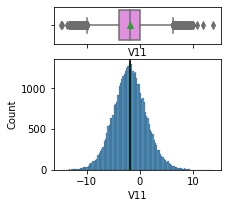

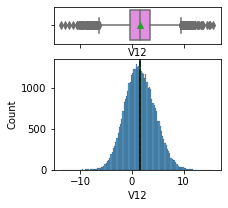

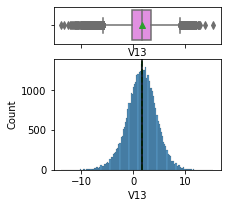

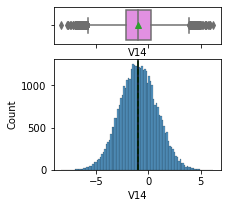

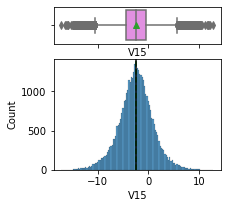

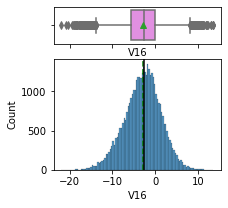

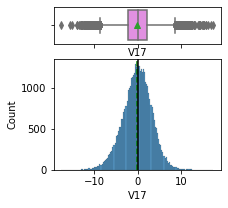

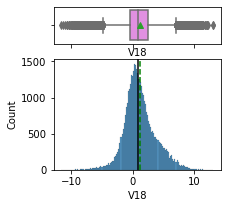

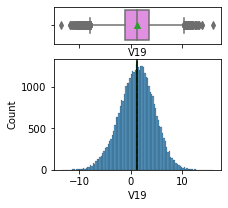

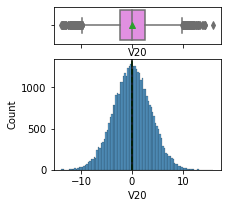

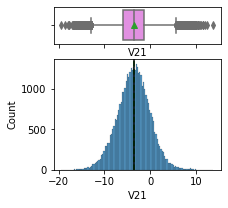

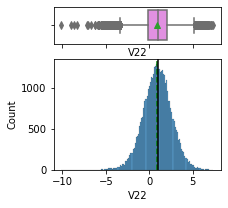

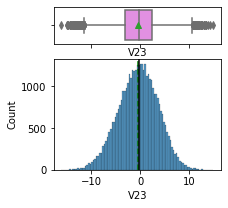

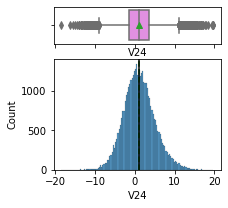

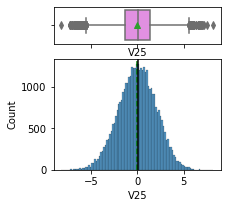

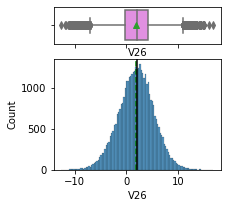

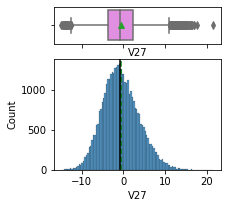

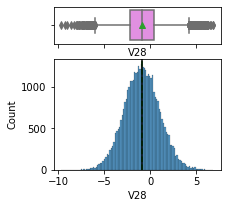

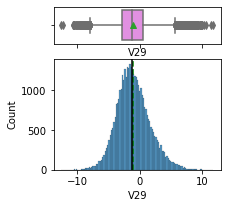

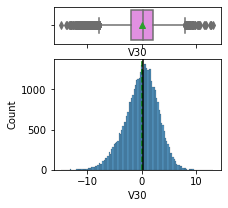

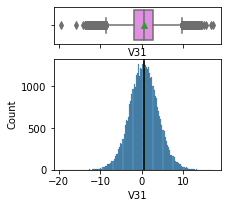

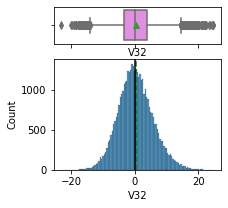

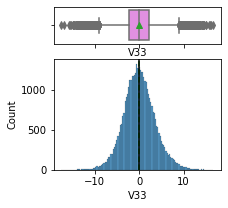

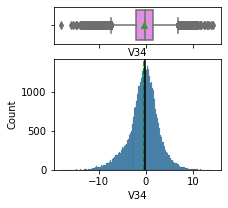

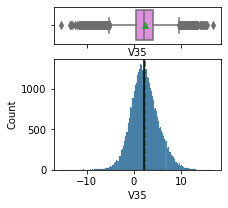

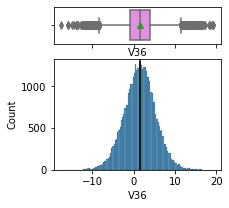

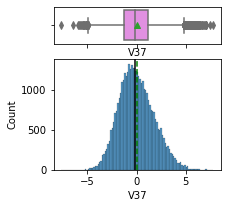

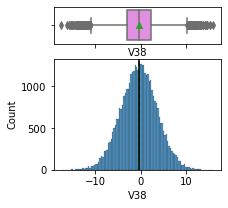

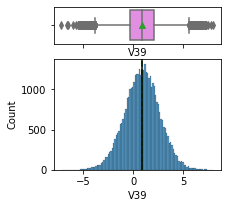

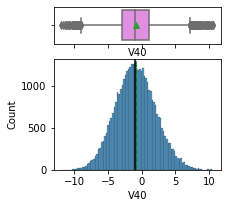

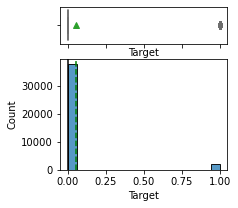

<IPython.core.display.Javascript object>

In [10]:
cols = data.columns
# cols.remove("Target")
for col in cols:
    histogram_boxplot(data, col)

* Almost all columns are normally distributed. Few of them are slightly skewed.
* All columns have lower and higher end outliers.
* They cannot be removed as we need more information on what the columns actually represent and the importances of the columns.

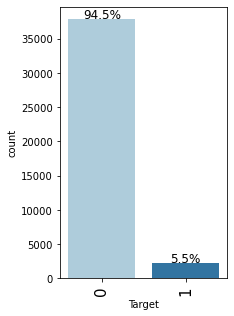

<IPython.core.display.Javascript object>

In [11]:
labeled_barplot(data, "Target", perc=True)

* 94.5% of the rows are not a failure. This shows that the data is highly imbalanced. 

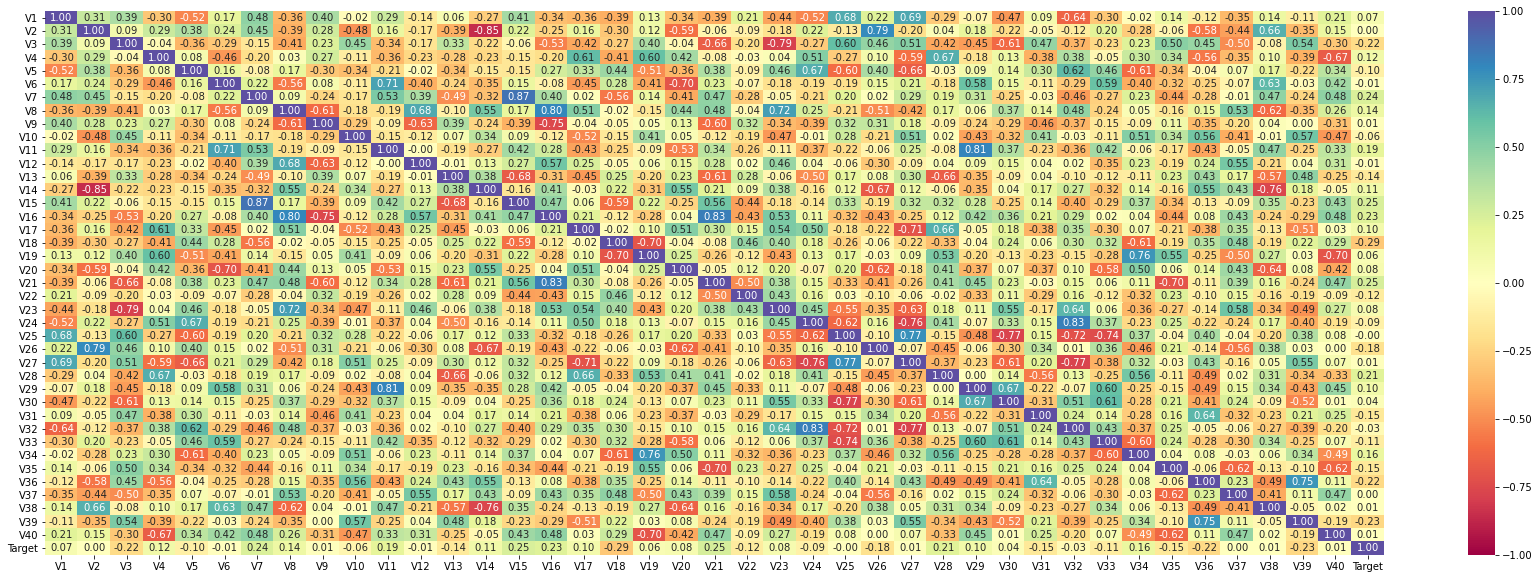

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Target has highest correlation with V18, followed by V39.

### EDA Insights

* The Train dataset has 40,000 rows and 41 columns. 
* There are 40 predictor variables and 1 Target variable.
* All of the are numeric values.
* Target variable is highly imbalanced with 94.5% 0s and 4.5% 1s. 
* All of the predictors are almost normally distributed with outliers. 
* 1st 2 columns have some missing values.

## Data Pre-processing

### Split data

In [13]:
df = data.copy()

<IPython.core.display.Javascript object>

In [14]:
X = df.drop(["Target"], axis=1)
y = df["Target"]

<IPython.core.display.Javascript object>

In [15]:
# Splitting data into training and validation sets:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

print(X_train.shape, X_val.shape)

(28000, 40) (12000, 40)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use median to impute missing values in all the predictor columns.

In [16]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)

<IPython.core.display.Javascript object>

* Missing values are treated after splitting of train data into training and validation tests. This ensures that there is no data leakage between the sets. 

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
1. Replacement cost - False Negatives - Predicting no failure, while there will be a failure
2. Inspection cost - False Positives - Predicting failure, while there is no failure 
3. Repair cost - True Positives - Predicting failure correctly

### How to reduce the overall cost?
* The cost associated with any model = TP * 15000 + FP * 5000 + FN * 40000
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN) * 15000
* So, we will try to maximize `Minimum cost/Cost associated with model`

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [17]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost / Cost
    )  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [18]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## **Defining scorer to be used for hyperparameter tuning**

- Every prediction of a classification model will be either a TP, FP, FN or TN.
- Here, we not only want to minimize false negatives but also false positives and we are also given the costs associated with each type of prediction.
- So, overall we want to reduce the maintenance cost which is: `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
- In simple language, we can say that we are assigning different weightage to the different types of predictions.
- In sklearn, we can define **custom scorers** also as per our need.
- For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
  - Minimize (maintenance cost)
  - Maximize (1/maintenance cost)
  - Maximize (minimum possible maintenance cost/maintenance cost)
- Eventually, all 3 metrics will do the same work in the backend and the only difference will be in the scale of the values of the metric.

- The metric provided in the next cell is to `maximize(minimum possible maintenance cost/maintenance cost)`

In [19]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

<IPython.core.display.Javascript object>

## Model Building with Original data

In [20]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Train Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = Minimum_Vs_Model_cost(y_train, model.predict(X_train))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 53.15403616048175
Bagging: 68.12807591389468
Random forest: 71.09742970474746
GBM: 67.82623334842278
Adaboost: 60.233603154203706
Xgboost: 77.13551730843292
dtree: 65.60666496504416

Train Performance:

Logistic Regression: 0.5319666435024323
Bagging: 0.933916226108174
Random forest: 0.9989125706829056
GBM: 0.7310202132739138
Adaboost: 0.6077808654227869
Xgboost: 1.0
dtree: 1.0


<IPython.core.display.Javascript object>

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Bagging'),
 Text(2, 0, 'Random forest'),
 Text(3, 0, 'GBM'),
 Text(4, 0, 'Adaboost'),
 Text(5, 0, 'Xgboost'),
 Text(6, 0, 'dtree')]

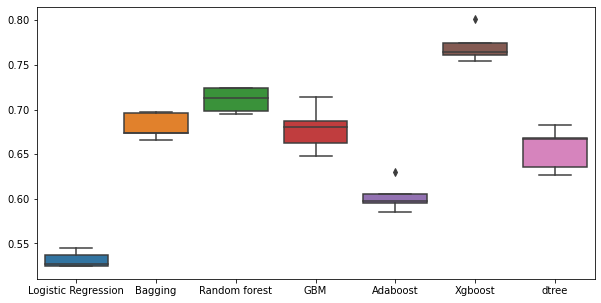

<IPython.core.display.Javascript object>

In [21]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

Highest scores by:

1. XGBoost
2. Random Forest
3. Bagging

## Model Building with Oversampled data


In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [23]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_over==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


Before UpSampling, counts of label '1': 1531
Before UpSampling, counts of label '0': 26469 

After UpSampling, counts of label '1': 26469
After UpSampling, counts of label '0': 26469 

After UpSampling, the shape of train_X: (52938, 40)
After UpSampling, the shape of train_y: (52938,) 



<IPython.core.display.Javascript object>

In [24]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Logistic Regression_Over", LogisticRegression(random_state=1)))
models_over.append(("Bagging_Over", BaggingClassifier(random_state=1)))
models_over.append(("Random forest_Over", RandomForestClassifier(random_state=1)))
models_over.append(("GBM_Over", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost_Over", AdaBoostClassifier(random_state=1)))
models_over.append(
    ("Xgboost_Over", XGBClassifier(random_state=1, eval_metric="logloss"))
)
models_over.append(("dtree_Over", DecisionTreeClassifier(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
score_over = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance with Oversampled data:" "\n")
for name, model in models_over:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Train Performance with Oversampled data:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = Minimum_Vs_Model_cost(y_train_over, model.predict(X_train_over))
    score_over.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance with Oversampled data:

Logistic Regression_Over: 79.91885856657728
Bagging_Over: 95.67710595379042
Random forest_Over: 96.84099076356955
GBM_Over: 86.98213334032019
Adaboost_Over: 83.02735716914681
Xgboost_Over: 97.35494688964317
dtree_Over: 93.5799411923789

Train Performance with Oversampled data:

Logistic Regression_Over: 0.7997723770483548
Bagging_Over: 0.9976255088195387
Random forest_Over: 1.0
GBM_Over: 0.8726427535276275
Adaboost_Over: 0.8345542254779346
Xgboost_Over: 0.9979264062735635
dtree_Over: 1.0


<IPython.core.display.Javascript object>

[Text(0, 0, 'Logistic Regression_Over'),
 Text(1, 0, 'Bagging_Over'),
 Text(2, 0, 'Random forest_Over'),
 Text(3, 0, 'GBM_Over'),
 Text(4, 0, 'Adaboost_Over'),
 Text(5, 0, 'Xgboost_Over'),
 Text(6, 0, 'dtree_Over')]

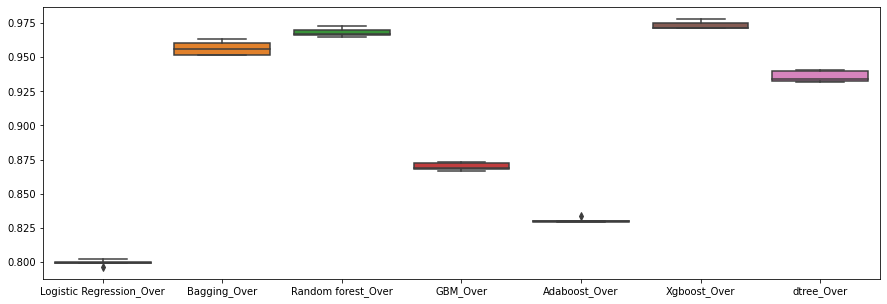

<IPython.core.display.Javascript object>

In [25]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=results_over)
ax.set_xticklabels(names_over)

Highest scores by:
1. XGBoost
2. Random Forest
3. Bagging

## Model Building with Undersampled data

In [26]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))


# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_under==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_under.shape))


Before UpSampling, counts of label '1': 1531
Before UpSampling, counts of label '0': 26469 

After UpSampling, counts of label '1': 1531
After UpSampling, counts of label '0': 1531 

After UpSampling, the shape of train_X: (3062, 40)
After UpSampling, the shape of train_y: (3062,) 



<IPython.core.display.Javascript object>

In [27]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Logistic Regression_Under", LogisticRegression(random_state=1)))
models_under.append(("Bagging_Under", BaggingClassifier(random_state=1)))
models_under.append(("Random forest_Under", RandomForestClassifier(random_state=1)))
models_under.append(("GBM_Under", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost_Under", AdaBoostClassifier(random_state=1)))
models_under.append(
    ("Xgboost_Under", XGBClassifier(random_state=1, eval_metric="logloss"))
)
models_under.append(("dtree_Under", DecisionTreeClassifier(random_state=1)))

results_under = []  # Empty list to store all model's CV scores
names_under = []  # Empty list to store name of the models
score_under = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance with Undersampled data:" "\n")
for name, model in models_under:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    results_under.append(cv_result)
    names_under.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Train Performance with Undersampled data:" "\n")

for name, model in models_under:
    model.fit(X_train_under, y_train_under)
    scores = Minimum_Vs_Model_cost(y_train_under, model.predict(X_train_under))
    score_under.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance with Undersampled data:

Logistic Regression_Under: 77.24863000214184
Bagging_Under: 81.0537034879969
Random forest_Under: 84.2602547619812
GBM_Under: 82.60845219126203
Adaboost_Under: 78.75970384722429
Xgboost_Under: 84.05650028470488
dtree_Under: 76.23582706765808

Train Performance with Undersampled data:

Logistic Regression_Under: 0.772322179250042
Bagging_Under: 0.9624895222129086
Random forest_Under: 1.0
GBM_Under: 0.8726961808854266
Adaboost_Under: 0.8197394253078708
Xgboost_Under: 1.0
dtree_Under: 1.0


<IPython.core.display.Javascript object>

[Text(0, 0, 'Logistic Regression_Under'),
 Text(1, 0, 'Bagging_Under'),
 Text(2, 0, 'Random forest_Under'),
 Text(3, 0, 'GBM_Under'),
 Text(4, 0, 'Adaboost_Under'),
 Text(5, 0, 'Xgboost_Under'),
 Text(6, 0, 'dtree_Under')]

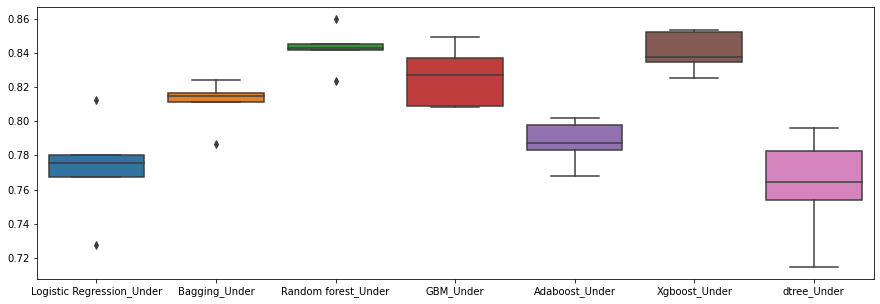

<IPython.core.display.Javascript object>

In [28]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=results_under)
ax.set_xticklabels(names_under)

Highest scores by:
1. Random Forest
2. XGBoost
3. GBM

## Comparing all models

In [29]:
for i in range(0, 7):
    print("{}: {}".format(names[i], results[i].mean() * 100))
    print("{}: {}".format(names_over[i], results_over[i].mean() * 100))
    print("{}: {}".format(names_under[i], results_under[i].mean() * 100))
    print("\n")


Logistic Regression: 53.15403616048175
Logistic Regression_Over: 79.91885856657728
Logistic Regression_Under: 77.24863000214184


Bagging: 68.12807591389468
Bagging_Over: 95.67710595379042
Bagging_Under: 81.0537034879969


Random forest: 71.09742970474746
Random forest_Over: 96.84099076356955
Random forest_Under: 84.2602547619812


GBM: 67.82623334842278
GBM_Over: 86.98213334032019
GBM_Under: 82.60845219126203


Adaboost: 60.233603154203706
Adaboost_Over: 83.02735716914681
Adaboost_Under: 78.75970384722429


Xgboost: 77.13551730843292
Xgboost_Over: 97.35494688964317
Xgboost_Under: 84.05650028470488


dtree: 65.60666496504416
dtree_Over: 93.5799411923789
dtree_Under: 76.23582706765808




<IPython.core.display.Javascript object>

**Observations**

* In all classifiers oversampled data gives higher crossvalidation scores.
* Original data gives the lowest crossvalidation scores.

## Model Selection

On comparing crossvalidation scores of all models we can see that:

1. **XGBoost** with **oversampled data** has highest score of 97.35
2. **Random forest** with **oversampled data** has score of 96.84
3. **Bagging** with **oversampled data** has a score of 95.677

We will choose these 3 models for hyperparameter tuning.

**We will tune Xgboost, Random forest and Bagging models. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

## XGBoost

### RandomizedSearchCV

In [30]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(150,300,50),'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)
#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8055363034528027:
Wall time: 43min 48s


<IPython.core.display.Javascript object>

In [31]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=250,
    scale_pos_weight=10,
    gamma=5,
    subsample=0.9,
    learning_rate=0.1,
    eval_metric="logloss",
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [32]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,1.000,0.988,0.994,0.996


<IPython.core.display.Javascript object>

In [33]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.991,0.869,0.958,0.911,0.812


<IPython.core.display.Javascript object>

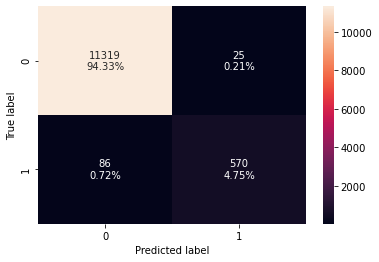

<IPython.core.display.Javascript object>

In [34]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

* Minimum_Vs_Model_cost is 0.812

## Random Forest

### GridSearchCV  

In [37]:
%%time 

#defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = { "n_estimators": [150,250], "min_samples_leaf": np.arange(1, 3), "max_features": ['sqrt','log2'], "max_samples": np.arange(0.2, 0.6, 0.1)}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters are {'max_features': 'log2', 'max_samples': 0.5000000000000001, 'min_samples_leaf': 1, 'n_estimators': 250} with CV score=0.9588346325987137:
Wall time: 13min 24s


<IPython.core.display.Javascript object>

In [38]:
# building model with best parameters
randomforest_tuned1 = RandomForestClassifier(
    max_features="log2",
    max_samples=0.5000000000000001,
    min_samples_leaf=1,
    n_estimators=250,
)

# Fit the model on training data
randomforest_tuned1.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', max_samples=0.5000000000000001,
                       n_estimators=250)

<IPython.core.display.Javascript object>

In [39]:
# Calculating different metrics on train set
randomforest_grid_train = model_performance_classification_sklearn(
    randomforest_tuned1, X_train_over, y_train_over
)
print("Training performance:")
randomforest_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.998,1.000,0.999,0.997


<IPython.core.display.Javascript object>

In [40]:
# Calculating different metrics on validation set
randomforest_grid_val = model_performance_classification_sklearn(
    randomforest_tuned1, X_val, y_val
)
print("Validation performance:")
randomforest_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,0.864,0.945,0.903,0.805


<IPython.core.display.Javascript object>

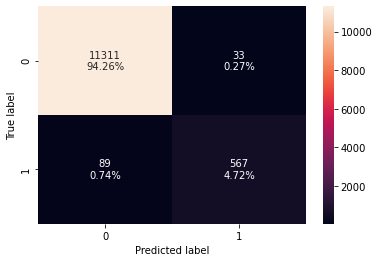

<IPython.core.display.Javascript object>

In [41]:
# creating confusion matrix
confusion_matrix_sklearn(randomforest_tuned1, X_val, y_val)

Minimum_Vs_Model_cost is 0.807

### RandomizedSearchCV  

In [42]:
%%time 

#defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = { "n_estimators": [150,250], "min_samples_leaf": np.arange(1, 3), "max_features": ['sqrt','log2'], "max_samples": np.arange(0.2, 0.6, 0.1)}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

#Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in GridSearchCV
random_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'n_estimators': 150, 'min_samples_leaf': 1, 'max_samples': 0.5000000000000001, 'max_features': 'log2'} with CV score=0.9576320538531202:
Wall time: 3min 47s


<IPython.core.display.Javascript object>

In [43]:
# building model with best parameters
randomforest_tuned2 = RandomForestClassifier(
    max_features="log2",
    max_samples=0.5000000000000001,
    min_samples_leaf=1,
    n_estimators=150,
)

# Fit the model on training data
randomforest_tuned2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', max_samples=0.5000000000000001,
                       n_estimators=150)

<IPython.core.display.Javascript object>

In [44]:
# Calculating different metrics on train set
randomforest_random_train = model_performance_classification_sklearn(
    randomforest_tuned2, X_train_over, y_train_over
)
print("Training performance:")
randomforest_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.998,1.000,0.999,0.996


<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics on validation set
randomforest_random_val = model_performance_classification_sklearn(
    randomforest_tuned2, X_val, y_val
)
print("Validation performance:")
randomforest_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,0.870,0.945,0.906,0.811


<IPython.core.display.Javascript object>

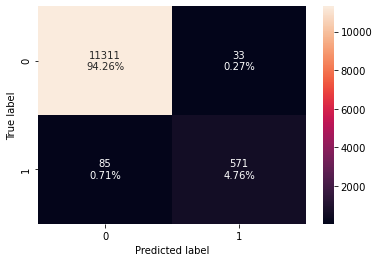

<IPython.core.display.Javascript object>

In [46]:
# creating confusion matrix
confusion_matrix_sklearn(randomforest_tuned2, X_val, y_val)

* Minimum_Vs_Model_cost is 0.812, more than the result from GridSearchCV.

## Bagging

### GridSearchCV  

In [47]:
%%time 

#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = { 'max_samples': [0.8,0.9], 'max_features': [0.8,0.9], 'n_estimators' : [40,50]}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters are {'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 50} with CV score=0.9647574090839696:
Wall time: 12min 27s


<IPython.core.display.Javascript object>

In [48]:
# building model with best parameters
bagging_tuned1 = BaggingClassifier(
    max_features=0.8,
    max_samples=0.9,
    n_estimators=50,
)

# Fit the model on training data
bagging_tuned1.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50)

<IPython.core.display.Javascript object>

In [49]:
# Calculating different metrics on train set
bagging_grid_train = model_performance_classification_sklearn(
    bagging_tuned1, X_train_over, y_train_over
)
print("Training performance:")
bagging_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics on validation set
bagging_grid_val = model_performance_classification_sklearn(
    bagging_tuned1, X_val, y_val
)
print("Validation performance:")
bagging_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.988,0.861,0.916,0.888,0.795


<IPython.core.display.Javascript object>

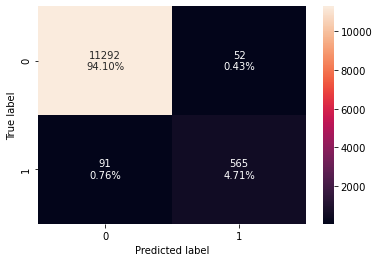

<IPython.core.display.Javascript object>

In [51]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned1, X_val, y_val)

* Model is overfitting as train data scores are all 1.00
* Minimum_Vs_Model_cost is 0.800

### RandomizedSearchCV  

In [52]:
%%time 

#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = { 'max_samples': [0.8,0.9], 'max_features': [0.8,0.9], 'n_estimators' : [40,50]}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

#Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=4, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in GridSearchCV
random_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'n_estimators': 40, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.964226232882772:
Wall time: 7min 15s


<IPython.core.display.Javascript object>

In [53]:
# building model with best parameters
bagging_tuned2 = BaggingClassifier(
    max_features=0.8,
    max_samples=0.9,
    n_estimators=40,
)

# Fit the model on training data
bagging_tuned2.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=40)

<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics on train set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned2, X_train_over, y_train_over
)
print("Training performance:")
bagging_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [55]:
# Calculating different metrics on validation set
bagging_random_val = model_performance_classification_sklearn(
    bagging_tuned2, X_val, y_val
)
print("Validation performance:")
bagging_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.988,0.863,0.909,0.885,0.795


<IPython.core.display.Javascript object>

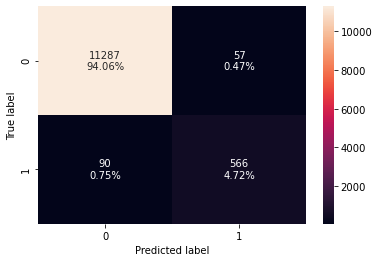

<IPython.core.display.Javascript object>

In [56]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned2, X_val, y_val)

* Minimum_Vs_Model_cost has slightly reduced compared to GridSearchCV results.
* Model is overfitting as train data scores are all 1.00


## Model Performance comparison and choosing the final model

## Comparing all models

In [57]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_random_train.T,
        randomforest_grid_train.T,
        randomforest_random_train.T,
        bagging_grid_train.T,
        bagging_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuned with Randomized search",
    "Random forest Tuned with Grid search",
    "Random forest Tuned with Randomized search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Randomized Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Tuned with Randomized search,Random forest Tuned with Grid search,Random forest Tuned with Randomized search,Bagging Tuned with Grid search,Bagging Tuned with Randomized Search
Accuracy,0.999,0.999,0.999,1.000,1.000
Recall,1.000,0.998,0.998,1.000,1.000
Precision,0.988,1.000,1.000,1.000,1.000
F1,0.994,0.999,0.999,1.000,1.000
Minimum_Vs_Model_cost,0.996,0.997,0.996,1.000,1.000


<IPython.core.display.Javascript object>

In [58]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_random_val.T,
        randomforest_grid_val.T,
        randomforest_random_val.T,
        bagging_grid_val.T,
        bagging_random_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuned with Randomized search",
    "Random forest Tuned with Grid search",
    "Random forest Tuned with Randomized search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Randomized Search",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost Tuned with Randomized search,Random forest Tuned with Grid search,Random forest Tuned with Randomized search,Bagging Tuned with Grid search,Bagging Tuned with Randomized Search
Accuracy,0.991,0.990,0.990,0.988,0.988
Recall,0.869,0.864,0.870,0.861,0.863
Precision,0.958,0.945,0.945,0.916,0.909
F1,0.911,0.903,0.906,0.888,0.885
Minimum_Vs_Model_cost,0.812,0.805,0.811,0.795,0.795


<IPython.core.display.Javascript object>

* All scores in all models are high. 
* There is overfitting in Bagging models.
* XGBoost with Random search and Random Forest with Random search give the highest Minimum_Vs_Model_cost score. XGBoost has slightly higher scores for all other metrics. So,
# The final model chosen is XGBoost with Oversampled data and RandomizedSearchCV.

## Test set final performance

In [59]:
# Load test data
test_data = pd.read_csv("Test.csv")
# Separating target variable and other variables
X_test = test_data.drop(columns="Target", axis=1)
y_test = test_data["Target"]

<IPython.core.display.Javascript object>

In [60]:
test_data.shape

(10000, 41)

<IPython.core.display.Javascript object>

In [61]:
# let's check for duplicate values in the data
test_data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [62]:
# let's check for missing values in the data
test_data.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

There are few missing values in 1st 2 columns. We will treat it using the imputer() (defined earlier) for test data seperately. So there is no data leakage to test data too.

In [63]:
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

### Performance on test set

In [64]:
# Calculating different metrics on test set
xgboost_random_test = model_performance_classification_sklearn(
    xgb_tuned2, X_test, y_test
)
print("Testing performance:")
xgboost_random_test

Testing performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,0.859,0.953,0.904,0.801


<IPython.core.display.Javascript object>

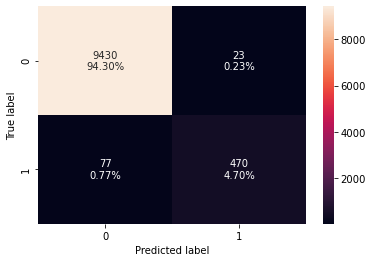

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_test, y_test)

**Minimum_Vs_Model_cost score is 0.801 which is good.**

### Feature Importances

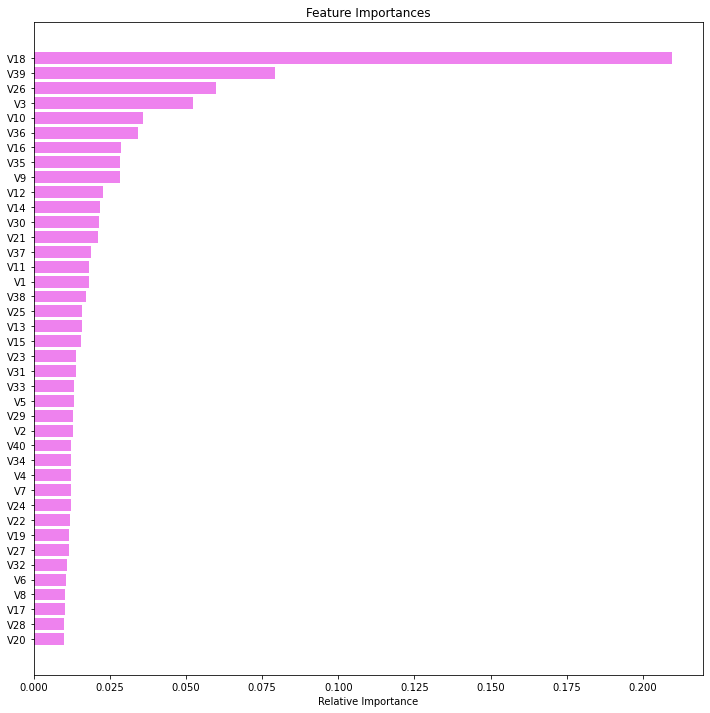

<IPython.core.display.Javascript object>

In [66]:
feature_names = X.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Column V18** is the most important feature followed by V39. (The same was seen in the correlation heatmap too).

## Pipelines to build the final model


- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- For numerical columns, we will do missing value imputation as pre-processing
- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [67]:
# creating a list of numerical variables
numerical_features = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11",
       "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21",
       "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30", "V31",
       "V32", "V33", "V34", "V35", "V36", "V37", "V38", "V39", "V40",
                     ]
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

**Loading test data**

In [68]:
# Separating target variable and other variables
X_train = data.drop(columns="Target", axis=1)
y_train = data["Target"]

<IPython.core.display.Javascript object>

## Pipeline

In [69]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),  # treating missing values
        (
            "upsampling",
            SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1),
        ),  # creating oversampled data
        (
            "XGBoost Classifier",  # Classifier for model building with best parameters
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.9,
                learning_rate=0.1,
                eval_metric="logloss",
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('upsampling', SMOTE(...
                 

<IPython.core.display.Javascript object>

## Business Insights 

* Variable V18 is the most important feature in the model to predict the Target variable
* XGBoost and Random Forest gave very similar results with RandomizedSearchCV. XGBoost had better scores for other metrics too.
* Running time of XGBoost with RandomizedSearchCV was the highest. 
* In Random Forest and Bagging models, RandomizedSearchCV was faster than GridSearchCV.
* Best performances were seen with Oversampled data. 
* With Undersampled data a lot of information will be getting lost as many rows are removed. 
* Original data gave the lowest scores in all models as the data is highly imbalanced.
* Outliers were not treated, Feature engineering was not done, dependencies of variables with one and another could not be analysed as only ciphered version of the data is available. 
* With more specific information on variables, it will be possible to build a model with higher performance.




## Recommendations

* Features related to various parts of the wind turbine like gearbox, tower, blades, break, etc. can be controlled. Environmental factors such as wind speed, temperature, humidity etc. cannot be controlled by us. So, based on the environmental factors mechanical features can be adjusted to efficiently use the turbine and also to manitain parts of the turbine.

* Based on the wind speed, the breaks of the turbine can be controlled.

* If humidity is higher (than a certain level) of its raining it is best to stop the turbines as moisture/water can get inside the moving parts and cause damage in the joints. It can also affect the coating of the turbine blades.

* Too much vibration in the turbine shaft indicate the shaft has run too far out of place and needs to be realigned.

* Lubrication needs to be checked at regular intervals and attended to regularly. 

## Conclusion

* 3 datasets were used: Original data, Oversampled data and Undersampled data.
* 6 Classifiers were used for model building with each of the datasets.
* 18 models were built using cross validation and 3 models with highest cross validation scores were chosen for hypertuning.
* GridSearchCV and RandomSearchCV were used to select the best parameters.
* The model with the highest Minimum_Vs_Model_cost score: **XGBoost with Oversampled data and RandomizedSearchCV** was chosen as the final model.
* Test data was fit on the final model which gave Minimum_Vs_Model_cost score as 0.801
* Finally in the pipeline the steps were: 
    1. Treat missing values
    2. Oversample data
    3. Build XGBoost classifier with best parameters